# PROYECTO 2

# Introducción al Análisis de Datos


**Introducción**

Contar con una excelente estrategia operativa permite a las empresas coordinar a los diferentes departamentos de manera eficiente para lograr ofrecer un servicio de calidad y por ende tener clientes satisfechos e incluso la fidelidad de algunos. 

Synergy Logistics es una empresa dedicada a la intermediación de servicios de importación y exportación de diferentes productos. Actualmente la empresa cuenta con una base de datos que refleja las rutas más importantes que opera desde el año 2015, con su respectivo origen y destino, año, producto, modo de transporte y valor total.

El propósito del presente código es generar un análisis que sirva para la estructuración de una estrategia operativa.



### *IMPORTACIÓN DE DATOS*

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
filepath = 'synergy_logistics_database.csv'
#el parse es para que me considere las fechas como tal y no como un texto
base = pd.read_csv(filepath, index_col="register_id", parse_dates = True)


### *RUTAS DE IMPORTACIÓN Y EXPORTACIÓN*
*Opción 1*

#### Separando los datos necesarios para el análisis

In [2]:
'''Se crean dos diccionarios, uno para las exportaciones y otro para importaciones en el cual la clave sea la ruta y los 
valores sean una lista que contenga en la primera posición la cantidad de veces que se usó (demandó) la ruta y en la 
segunda la suma del valor total'''

exp_rutas = {}
imp_rutas = {}

#en el siguiente for se guardan los datos en los diccionarios
for a,b,c,d,e in zip(base["origin"], base["destination"],base["transport_mode"],base["total_value"], base["direction"]):
    if e == "Exports":
        #valida que la ruta no esté en el diccionario y si está se van haciendo las sumas de la cantidad de veces y el total
        if (a,b,c) not in exp_rutas:
            exp_rutas[a,b,c] = [1,d]
        else:
            exp_rutas[a,b,c] = [exp_rutas[a,b,c][0]+1, exp_rutas[a,b,c][1] + d]
    else:
        if e == "Imports":
            if (a,b,c) not in imp_rutas:
                imp_rutas[a,b,c] = [1,d]
            else:
                imp_rutas[a,b,c] = [imp_rutas[a,b,c][0]+1, imp_rutas[a,b,c][1] + d]


In [3]:
'''Se crean una lista para importaciones y otra para exportaciones, los datos se obtienen del diccionario hecho 
anteriormente'''

importaciones = []

#se guardan en cada lista los datos 
for origen,destino,medio in imp_rutas.keys():
    lista_imp = [origen,destino,medio, imp_rutas[origen,destino,medio][0], imp_rutas[origen,destino,medio][1]]
    importaciones.append(lista_imp)

exportaciones = []
for origen,destino,medio in exp_rutas.keys():
    lista_exp = [origen,destino,medio, exp_rutas[origen,destino,medio][0], exp_rutas[origen,destino,medio][1]]
    exportaciones.append(lista_exp)
    

In [4]:
'''ya que se tienen las listas de las importaciones y exportaciones, se ordenan de acuerdo con la cantidad de veces que
fueron demandadas'''

importaciones.sort(reverse = True, key = lambda x:x[3])
exportaciones.sort(reverse = True, key = lambda x:x[3])

'''las listas se convierten a dataframe para obtener una mejor visualización de los datos'''

mre = pd.DataFrame(exportaciones, columns=['Origen','Destino','Medio de Transporte','# de demanda', 'Valor Total'])
top = mre.drop(['Valor Total'], axis = 1) #quitando lo última columna porque ese dato no es útil aquí
print("        DIEZ RUTAS DE EXPORTACIÓN MÁS DEMANDADAS DE EXPORTACIONES")
top.head(10)


        DIEZ RUTAS DE EXPORTACIÓN MÁS DEMANDADAS DE EXPORTACIONES


,Origen,Destino,Medio de Transporte,# de demanda
0,South Korea,Vietnam,Sea,497
1,USA,Netherlands,Sea,436
2,Netherlands,Belgium,Road,374
3,China,Mexico,Air,330
4,Japan,Brazil,Sea,306
5,Germany,France,Road,299
6,South Korea,Japan,Sea,279
7,Australia,Singapore,Sea,273
8,Canada,Mexico,Rail,261
9,China,Spain,Air,250


In [5]:
mri = pd.DataFrame(importaciones, columns=['Origen','Destino','Medio de Transporte','# de demanda', 'Valor Total'])
topi = mri.drop(['Valor Total'], axis = 1) #quitando lo última columna porque ese dato no es útil aquí
print("        DIEZ RUTAS MÁS DEMANDADAS DE IMPORTACIÓN")
topi.head(10)


        DIEZ RUTAS MÁS DEMANDADAS DE IMPORTACIÓN


,Origen,Destino,Medio de Transporte,# de demanda
0,Singapore,Thailand,Sea,273
1,Germany,China,Sea,233
2,China,Japan,Air,210
3,Japan,Mexico,Sea,206
4,Malaysia,Thailand,Rail,195
5,China,Thailand,Road,145
6,Spain,Germany,Road,142
7,China,United Arab Emirates,Sea,114
8,Brazil,China,Sea,113
9,USA,Thailand,Sea,109


**A continuación se creará una gráfica de barras para las mejores rutas, en lugar del nombre de las rutas en el eje x se estará usando el número de demanda ya que están ordenados de esa manera y para el eje y se estará utilizando el valor total que tiene acumulado cada ruta**

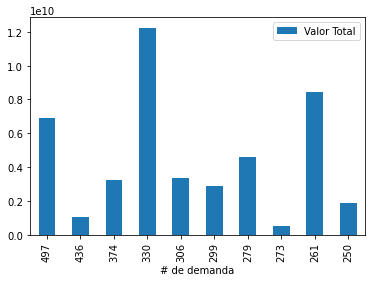

In [6]:
mre.head(10).plot.bar(x='# de demanda', y='Valor Total')

*Esta gráfica es sobre las 10 mejores rutas de exportación, el orden en el eje x es según su demanda, tal como se muestra en la tabla impresa anteriormente, se observa que el valor total de algunas rutas es mucho más alto y no se encuentran en los primeros lugares, por ejemplos la 330 y la 261.*

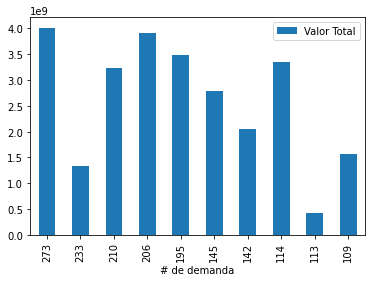

In [7]:
mri.head(10).plot.bar(x='# de demanda', y='Valor Total')

*Esta gráfica es sobre las 10 mejores rutas de importación, el orden en el eje x es según su demanda, tal como se muestra en la tabla impresa anteriormente para importaciones, se observa que el valor total de algunas rutas es mucho más alto y no se encuentran en los primeros lugares, por ejemplos la 206 y la 195.*

### ¿Le conviene implementar esa estrategia? ¿porqué?

*A la empresa NO le conviene implementar esta estrategia basándose en la demanda de cada ruta, pues como se observa en las gráficas, el que sean más demandadas no implica que generen mayores ingresos*


### *MEDIOS DE TRANSPORTE UTILIZADOS*
*Opción 2*

In [8]:
'''Se crea una lista de los únicos medios de transporte en la base de datos'''
medio_transporte = list(base["transport_mode"].unique())

'''se crean unas listas que contengan esos únicos medios de transporte con un valor numérico para posteriormente 
llenarlos'''
medio_exp = [[medio,0] for medio in medio_transporte]
medio_imp = [[medio,0] for medio in medio_transporte]

'''Los siguientes bucles for acumulan los valores totales obtenidos en importaciones y exportaciones para cada medio de 
transporte'''
for medio in medio_transporte:
    for lista in importaciones:
        if lista[2] == medio:
            medio_imp[medio_transporte.index(medio)][1] += lista[4]

for medio in medio_transporte:
    for lista in exportaciones:
        if lista[2] == medio:
            medio_exp[medio_transporte.index(medio)][1] += lista[4]


In [9]:
'''Ahora se ordenan las listas de acuerdo con el valor de importaciones y exportaciones'''
medio_imp.sort(reverse = True, key = lambda x:x[1])
medio_exp.sort(reverse = True, key = lambda x:x[1])

mte = pd.DataFrame(medio_exp, columns=['Medio de Transporte', 'Valor Total'])
print("TRES MEDIOS DE TRANSPORTE MÁS IMPORTANTES EN EXPORTACIONES")
mte.head(3)

TRES MEDIOS DE TRANSPORTE MÁS IMPORTANTES EN EXPORTACIONES


,Medio de Transporte,Valor Total
0,Sea,65592622000
1,Rail,34505043000
2,Air,32785147000


In [10]:
mti = pd.DataFrame(medio_imp, columns=['Medio de Transporte', 'Valor Total'])
print("TRES MEDIOS DE TRANSPORTE MÁS IMPORTANTES EN IMPORTACIONES")
mti.head(3)

TRES MEDIOS DE TRANSPORTE MÁS IMPORTANTES EN IMPORTACIONES


,Medio de Transporte,Valor Total
0,Sea,34938000000
1,Rail,9123000000
2,Road,5990000000


**A continuación se crea una gráfica que muestre la cantidad de veces que fueron demandados los medios de transporte en importaciones y exportaciones**

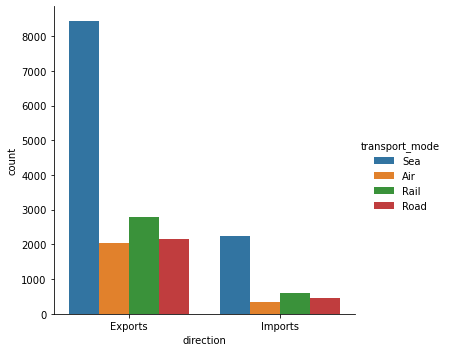

In [11]:
sns.catplot('direction',data=base,hue='transport_mode',kind='count')

*Nuevamente se observa que no están correlacionados las veces que se demanda un medio de transporte con los ingresos que éste genera*

### ¿Cuál es medio de transporte que podrían reducir? 

* En exportaciones pueden reducir "Road" ya que es el que menos ingresos les genera.
* En importaciones el que pueden reducir es "Air"

### *VALOR TOTAL DE IMPORTACIONES Y EXPORTACIONES*
*Opción 3*

In [12]:
'''Creando listas con el país de origen en exportaciones e importaciones'''
origen_unicos_exp = list(mre["Origen"].unique())
origen_unicos_imp = list(mri["Origen"].unique())

'''se crean listas que contengan esos únicos países de origen con un valor numérico para posteriormente 
llenarlos'''
paises_exp = [[pais,0] for pais in origen_unicos_exp]
paises_imp = [[pais,0] for pais in origen_unicos_imp]

'''Los siguientes bucles for acumulan los valores totales obtenidos en importaciones y exportaciones para cada país'''
for pais in origen_unicos_exp:
    for lista in exportaciones:
        if lista[0] == pais:
            paises_exp[origen_unicos_exp.index(pais)][1] += lista[4]

for pais in origen_unicos_imp:
    for lista in importaciones:
        if lista[0] == pais:
            paises_imp[origen_unicos_imp.index(pais)][1] += lista[4]


In [13]:
'''Ahora se ordenan las listas de acuerdo con el valor total en importaciones y exportaciones'''
paises_exp.sort(reverse = True, key = lambda x:x[1])
paises_imp.sort(reverse = True, key = lambda x:x[1])


In [14]:
'''Se obtiene el 80% del total de exportaciones y de importaciones para obtener los países que lo generan'''
ochenta_e = sum([e[1] for e in paises_exp])*0.8
ochenta_i = sum([i[1] for i in paises_imp])*0.8

'''Se crean listas que guardarán a los países que generan ese 80%'''
ochenta_exp = []
ochenta_imp = []
te = 0  #estas variables son para ir acumulando el valor de los totales por iteración
ti = 0

for totales in paises_exp:
    te+= totales[1]
    if te <= ochenta_e:
        ochenta_exp.append(totales)
        
for totales in paises_imp:
    ti+= totales[1]
    if ti <= ochenta_i:
        ochenta_imp.append(totales)      


In [15]:
oe = pd.DataFrame(ochenta_exp, columns=['País', 'Valor Total'])
print("PAISES QUE CONFORMAN EL 80% DE LAS EXPORTACIONES")
oe

PAISES QUE CONFORMAN EL 80% DE LAS EXPORTACIONES


,País,Valor Total
0,China,32977046000
1,France,18614332000
2,USA,18355306000
3,South Korea,14621146000
4,Russia,13223000000
5,Japan,11948976000
6,Germany,11343233000


In [16]:
oi = pd.DataFrame(ochenta_imp, columns=['País', 'Valor Total'])
print("PAISES QUE CONFORMAN EL 80% DE LAS IMPORTACIONES")
oi

PAISES QUE CONFORMAN EL 80% DE LAS IMPORTACIONES


,País,Valor Total
0,China,12233000000
1,Japan,8094000000
2,USA,5291000000
3,Mexico,4621000000
4,Germany,4250000000
5,Singapore,4017000000
6,South Korea,3889000000


**Nuevamente se crean gráficas**

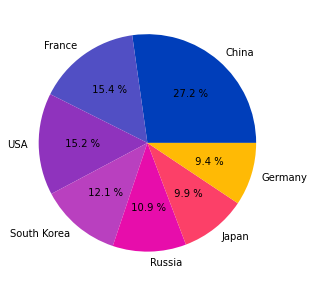

In [17]:
colores=["#003EBA","#514FC4","#8F33BD","#B940BF","#E70DAB","#FC4068","#FFBA05"]
fig, ax = plt.subplots(figsize =(5, 5))
plt.pie(oe['Valor Total'], labels= oe['País'], autopct = " %0.1f %% ",colors=colores)
plt.show()

*En las exportaciones China es el que más ingresos genera y entre los demás países la variación no es mucha*

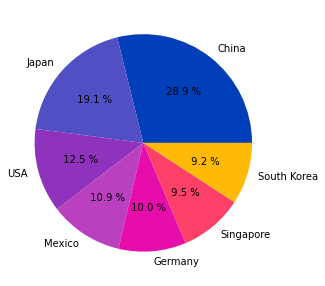

In [18]:
colores=["#003EBA","#514FC4","#8F33BD","#B940BF","#E70DAB","#FC4068","#FFBA05"]
fig, ax = plt.subplots(figsize =(5, 5))
plt.pie(oi['Valor Total'], labels= oi['País'], autopct = " %0.1f %% ",colors=colores)
plt.show()

*En las importaciones China nuevamente es el que genera mayores ingresos, sin embargo Japón sobresale también del resto del grupo de países*

### ¿En qué grupo de países debería enfocar sus esfuerzos?

*Los grupos de países en los que debe enfocarse están impresos en las tablas y gráficas anteriores*

### Opción sugerida como base de la estrategia de Synergy logistics

*Dados los resultados anteriores, si la empresa quiere considerar enfocarse en rutas tendría que ser mirando cuáles son las que generan más ingresos y no cuáles son las más demandadas, luego podría aplicarse el 80% como en el último punto y de ahí partir a hacer un análisis sobre los medios de transporte más utilizados en esas rutas para saber a cuáles invertirles más.*

*Considerando las opciones que la empresa quiso que fueran analizadas, le conviene más implementar como base en la estrategia la 2 y 3, ya que la dos muestra cuáles son los medios de transporte que más ingresos le generan y la 3 muestra cuáles son los países que involucran el 80% de sus ingresos.*

### *CONCLUSIONES*

Es importante aprovechar al máximo los recursos que se tienen, por lo tanto, crear estrategias para administrarlos mejor es una de las decisiones más sabias que se pueden tomar. 

En cuanto al curso, con los aprendizajes alcanzados ya se pueden hacer análisis más elaborados y fue demasiado interesante aprender más de lo que abarcaba el temario.